In [ ]:
content = """
# Problem Definition

Pneumonia is one of the most common and serious lung infections, and early diagnosis is critical for effective treatment.
Chest X-ray imaging is widely used in hospitals to detect signs of pneumonia. However, manual interpretation of X-ray
images can be time-consuming, prone to human error, and requires experienced radiologists.

This project aims to build a Deep Learning model using Convolutional Neural Networks (CNNs) to automatically classify
chest X-ray images into two categories:

- **Normal**
- **Pneumonia**

The goal is to develop an accurate and reliable AI system that can support medical professionals by providing fast
and automated pneumonia detection.

We use the *Chest X-Ray Images (Pneumonia)* dataset, which contains 5,863 X-ray images categorized into Normal and
Pneumonia across training, validation, and testing sets. The dataset includes pediatric chest X-rays that were
professionally graded and quality-checked by medical experts.

This project represents a real-world application of Deep Learning in the medical field and demonstrates how AI can
assist in disease detection and improve clinical decision-making.
"""


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)


Using Colab cache for faster access to the 'chest-xray-pneumonia' dataset.
Path to dataset files: /kaggle/input/chest-xray-pneumonia


In [ ]:
import os

train_path="/kaggle/input/chest-xray-pneumonia/chest_xray/train"
val_path="/kaggle/input/chest-xray-pneumonia/chest_xray/val"
test_path="/kaggle/input/chest-xray-pneumonia/chest_xray/test"

def count_images(path, split_name):
    normal_count = len(os.listdir(os.path.join(path, "NORMAL")))
    pneumonia_count = len(os.listdir(os.path.join(path, "PNEUMONIA")))
    total_count = normal_count + pneumonia_count
    print(f"--- {split_name} Set ---")
    print(f"NORMAL: {normal_count} images")
    print(f"PNEUMONIA: {pneumonia_count} images")
    print(f"Total: {total_count} images\n")

count_images(train_path, "Train")
count_images(val_path, "Validation")
count_images(test_path, "Test")

--- Train Set ---
NORMAL: 1341 images
PNEUMONIA: 3875 images
Total: 5216 images

--- Validation Set ---
NORMAL: 8 images
PNEUMONIA: 8 images
Total: 16 images

--- Test Set ---
NORMAL: 234 images
PNEUMONIA: 390 images
Total: 624 images



In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix



In [ ]:
# Transforms مناسبة لـ ResNet18 (pretrained on ImageNet)
from torchvision import datasets, transforms

train_transforms = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),   # X-ray → 3 قنوات
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

val_test_transforms = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


In [ ]:
train_data = datasets.ImageFolder(train_path, transform=train_transforms)
val_data   = datasets.ImageFolder(val_path, transform=val_test_transforms)
test_data  = datasets.ImageFolder(test_path, transform=val_test_transforms)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_data, batch_size=32, shuffle=False)


Exploratory Data Analysis (EDA)

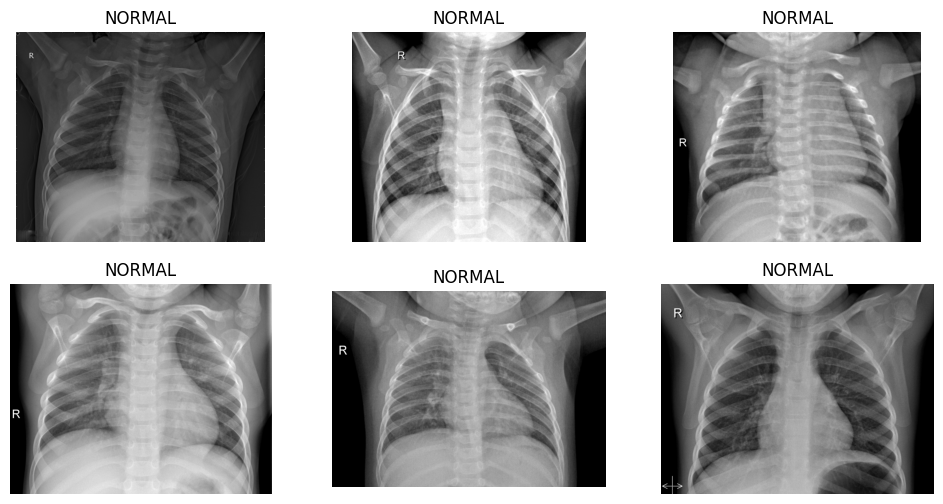

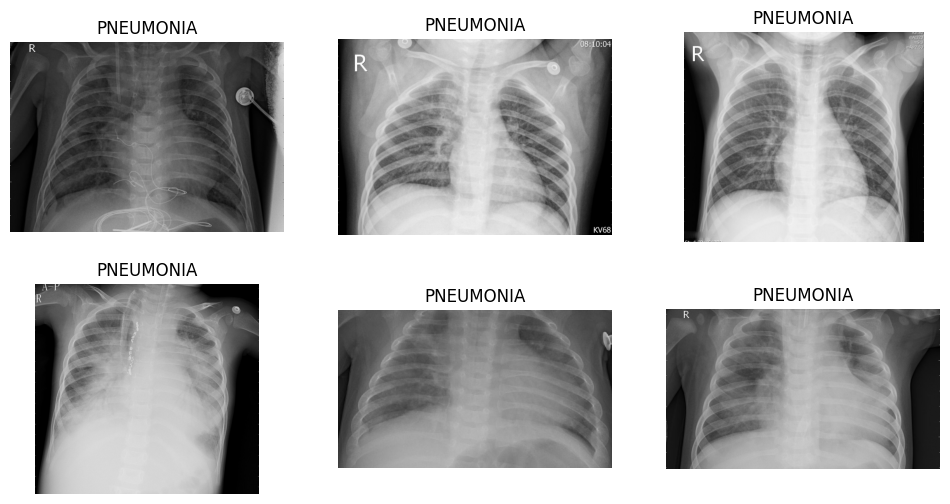

In [ ]:
from PIL import Image
def show_samples(data_path ,category ,n=6): #def show_samples(category, split="train", n=6):
    path = os.path.join(data_path, category)
    imgs = os.listdir(path)[:n]

    plt.figure(figsize=(12, 6))
    for i, img_name in enumerate(imgs):
        img_path = os.path.join(path, img_name)
        img = Image.open(img_path)

        plt.subplot(2, 3, i+1)
        plt.imshow(img, cmap="gray")
        plt.title(category)
        plt.axis("off")
    plt.show()

#show_samples("NORMAL", split="train", n=6)
#show_samples("PNEUMONIA", split="train", n=6)
show_samples(train_path,"NORMAL", n=6)
show_samples(train_path, "PNEUMONIA", n=6)


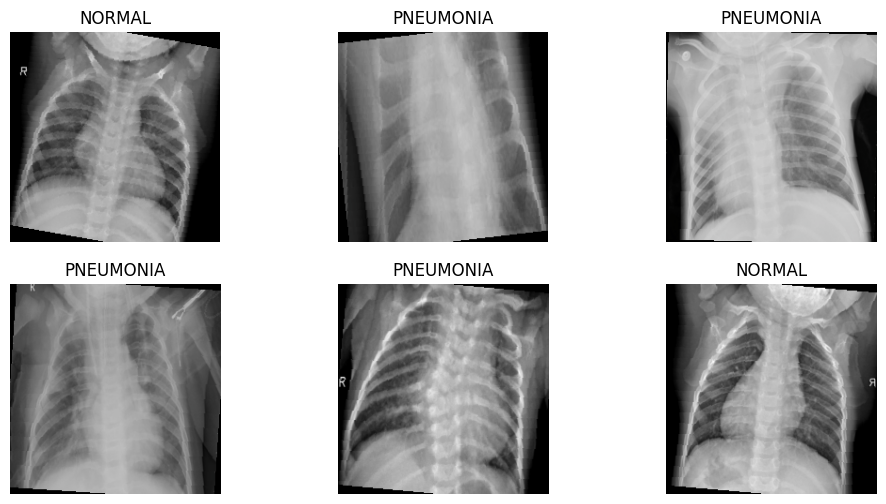

In [ ]:

imagenet_mean = np.array([0.485, 0.456, 0.406])
imagenet_std  = np.array([0.229, 0.224, 0.225])

def show_tensor_image(img_tensor):
    img = img_tensor.numpy().transpose(1, 2, 0)
    img = img * imagenet_std + imagenet_mean
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    plt.axis('off')

data_iter = iter(train_loader)
images, labels = next(data_iter)

plt.figure(figsize=(12, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    show_tensor_image(images[i])
    cls = train_data.classes[labels[i]]
    plt.title(cls)
plt.show()


Counter({1: 3875, 0: 1341})


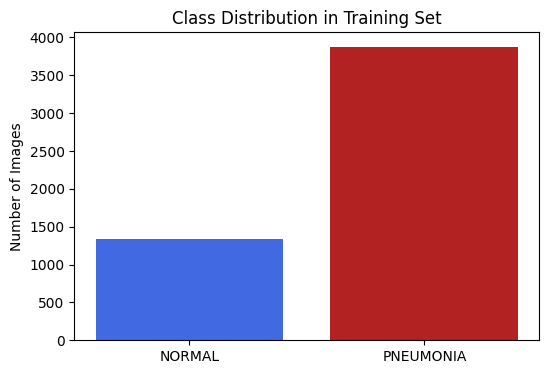

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

labels = train_data.targets

count = Counter(labels)

print(count)


classes = train_data.classes
values = [count[0], count[1]]

plt.figure(figsize=(6,4))
plt.bar(classes, values, color=['royalblue', 'firebrick'])
plt.title("Class Distribution in Training Set")
plt.ylabel("Number of Images")
plt.show()


class Weights

In [ ]:
import torch
from collections import Counter


label_counts = Counter(train_data.targets)
print("Label Counts:", label_counts)

normal_count = label_counts[0]
pneumonia_count = label_counts[1]

total = normal_count + pneumonia_count


weight_normal = total / (2 * normal_count)
weight_pneumonia = total / (2 * pneumonia_count)

class_weights = torch.tensor([weight_normal, weight_pneumonia])

print("Class Weights:", class_weights)


Label Counts: Counter({1: 3875, 0: 1341})
Class Weights: tensor([1.9448, 0.6730])


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models


In [ ]:

model = models.resnet18(pretrained=True)


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 70.1MB/s]


In [ ]:

for param in model.parameters():
    param.requires_grad = False


In [ ]:

num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

print("Using device:", device)


Using device: cuda


In [ ]:

print(model.fc)
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
total_params = sum(p.numel() for p in model.parameters())

print(f"Total parameters: {total_params}")
print(f"Trainable parameters: {trainable_params}")


Linear(in_features=512, out_features=2, bias=True)
Total parameters: 11177538
Trainable parameters: 1026


###Training

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
# Using class weights to solve imbalance
criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))

optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

num_epochs = 10
best_val_acc = 0.0

train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    print("-" * 30)
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_acc = correct / total

    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item()

                _, predicted = torch.max(outputs.data, 1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
    val_loss = val_running_loss / len(val_loader)
    val_acc = val_correct / val_total
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}")
    print(f"Val Loss:   {val_loss:.4f}, Val Acc:   {val_acc:.4f}")

    # Save best model
    if val_acc > best_val_acc:
       best_val_acc = val_acc
       torch.save(model.state_dict(), "best_model.pth")
       print(" Saved best model!")
print("\nTraining Completed!")





Epoch 1/10
------------------------------


100%|██████████| 163/163 [02:20<00:00,  1.16it/s]


Train Loss: 0.3385, Train Acc: 0.8625
Val Loss:   0.1904, Val Acc:   0.9375
 Saved best model!

Epoch 2/10
------------------------------


100%|██████████| 163/163 [01:58<00:00,  1.38it/s]


Train Loss: 0.2077, Train Acc: 0.9243
Val Loss:   0.2173, Val Acc:   0.9375

Epoch 3/10
------------------------------


100%|██████████| 163/163 [01:58<00:00,  1.37it/s]


Train Loss: 0.1902, Train Acc: 0.9300
Val Loss:   0.2056, Val Acc:   0.9375

Epoch 4/10
------------------------------


100%|██████████| 163/163 [01:59<00:00,  1.37it/s]


Train Loss: 0.1828, Train Acc: 0.9273
Val Loss:   0.2727, Val Acc:   0.8750

Epoch 5/10
------------------------------


100%|██████████| 163/163 [01:58<00:00,  1.38it/s]


Train Loss: 0.1586, Train Acc: 0.9375
Val Loss:   0.3927, Val Acc:   0.8125

Epoch 6/10
------------------------------


100%|██████████| 163/163 [01:58<00:00,  1.38it/s]


Train Loss: 0.1620, Train Acc: 0.9398
Val Loss:   0.2542, Val Acc:   0.9375

Epoch 7/10
------------------------------


100%|██████████| 163/163 [01:58<00:00,  1.37it/s]


Train Loss: 0.1482, Train Acc: 0.9465
Val Loss:   0.2780, Val Acc:   0.9375

Epoch 8/10
------------------------------


100%|██████████| 163/163 [01:59<00:00,  1.37it/s]


Train Loss: 0.1686, Train Acc: 0.9337
Val Loss:   0.7256, Val Acc:   0.6875

Epoch 9/10
------------------------------


100%|██████████| 163/163 [01:58<00:00,  1.37it/s]


Train Loss: 0.1481, Train Acc: 0.9461
Val Loss:   0.3631, Val Acc:   0.8125

Epoch 10/10
------------------------------


100%|██████████| 163/163 [01:58<00:00,  1.38it/s]


Train Loss: 0.1385, Train Acc: 0.9436
Val Loss:   0.3073, Val Acc:   0.8750

Training Completed!


###Testing

In [ ]:
model.load_state_dict(torch.load("best_model.pth"))
model.eval()

correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()
test_acc = correct / total
print(f"\nTest Accuracy: {test_acc:.4f}")




Test Accuracy: 0.8542


##Evaluation

              precision    recall  f1-score   support

      NORMAL       0.74      0.95      0.83       234
   PNEUMONIA       0.97      0.79      0.87       390

    accuracy                           0.85       624
   macro avg       0.85      0.87      0.85       624
weighted avg       0.88      0.85      0.86       624



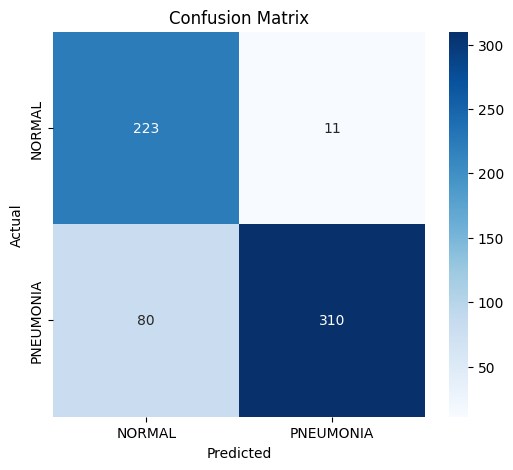

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

classes = ["NORMAL", "PNEUMONIA"]
print(classification_report(all_labels, all_preds, target_names=classes))
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


###Inference

In [ ]:
from PIL import Image
import torch
from torchvision import transforms,models

# same transforms as test
infer_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Load model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.resnet18(pretrained=False)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)

model.load_state_dict(torch.load("best_model.pth", map_location=device))
model = model.to(device)

model.eval()

classes = ["NORMAL", "PNEUMONIA"]

def predict_image(path):
    img = Image.open(path)
    img = infer_transform(img).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(img)
        _, pred = torch.max(outputs, 1)
    prediction = classes[pred.item()]

    print("Prediction:", classes[pred.item()])




/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
import os

#data_dir = "/content/chest_xray/chest_xray/test"
test_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/test"


normal_img  = os.path.join(test_path, "NORMAL", os.listdir(os.path.join(test_path, "NORMAL"))[0])
pneumonia_img = os.path.join(test_path, "PNEUMONIA", os.listdir(os.path.join(test_path, "PNEUMONIA"))[0])

print("Normal sample:", normal_img)
print("Pneumonia sample:", pneumonia_img)


Normal sample: /kaggle/input/chest-xray-pneumonia/chest_xray/test/NORMAL/NORMAL2-IM-0336-0001.jpeg
Pneumonia sample: /kaggle/input/chest-xray-pneumonia/chest_xray/test/PNEUMONIA/person1676_virus_2892.jpeg


In [ ]:
from google.colab import files

uploaded = files.upload()

uploaded_path = list(uploaded.keys())[0]
print("Uploaded file:", uploaded_path)


Saving person101_bacteria_485.jpeg to person101_bacteria_485 (3).jpeg
Uploaded file: person101_bacteria_485 (3).jpeg


In [ ]:
predict_image(uploaded_path)


Prediction: PNEUMONIA


In [ ]:
print("\n--- Testing Examples ---")
predict_image(normal_img)
predict_image(pneumonia_img)



--- Testing Examples ---
Prediction: NORMAL
Prediction: PNEUMONIA


In [ ]:
from google.colab import files

# اسم الموديل اللي اتخزن أثناء التدريب
model_file = "best_model.pth"

# تحميله على جهازك
files.download(model_file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>